In [50]:
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [51]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [52]:
df = pd.read_csv("/Users/lisajin/Documents/Smnology/sleepdata.csv",delimiter=";")
headers = np.array(df.columns)  # get headers
values = df.values  # numpy array of values
matrix = np.concatenate([[headers], values])  # append to the final matrix


data=pd.DataFrame(df).to_numpy()

#the data is collected via Sleep Cycle iOS app; the user is a single user however longtitude data 2014-2018 


In [53]:
df.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Start             887 non-null    object 
 1   End               887 non-null    object 
 2   Sleep quality     887 non-null    object 
 3   Time in bed       887 non-null    object 
 4   Wake up           246 non-null    object 
 5   Sleep Notes       652 non-null    object 
 6   Heart rate        162 non-null    float64
 7   Activity (steps)  887 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 55.6+ KB


<AxesSubplot:>

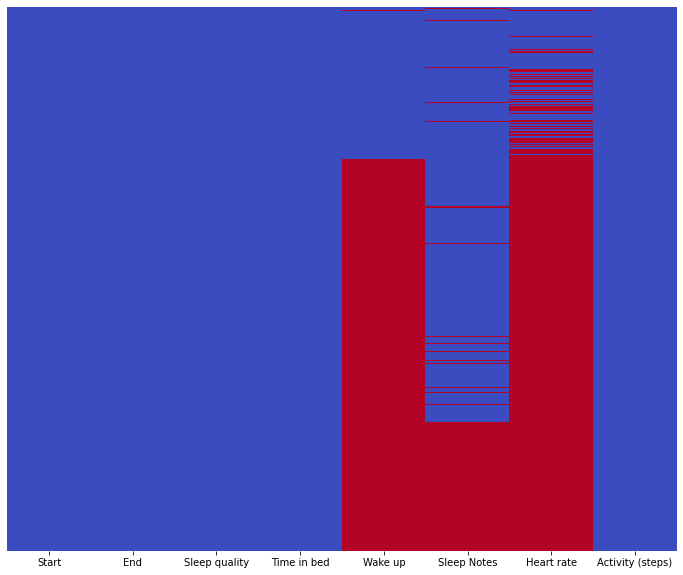

In [55]:
#check the null part in the whole data set, red part is missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [56]:
import time
import datetime

df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [57]:
df['Time in bed'] = df['End'] - df['Start']
df['Time in bed'] = df['Time in bed'].astype('timedelta64[s]')

In [58]:
df['Sleep quality'] = df['Sleep quality'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(int)

In [59]:
df['Start time'] = pd.Series([val.time() for val in df['Start']])
df['End time'] = pd.Series([val.time() for val in df['End']])

In [60]:
df['Start time in second'] = df['Start time'].apply(lambda x: (x.hour*60+x.minute)*60 + x.second)
df['End time in second'] = df['End time'].apply(lambda x: (x.hour*60+x.minute)*60 + x.second)

Text(0.5, 1.0, 'Correlation')

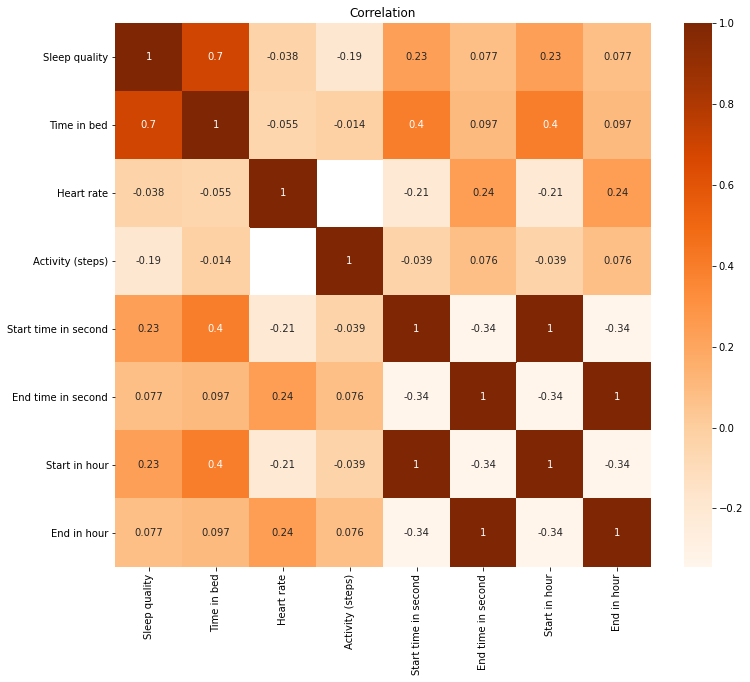

In [82]:
import matplotlib.pyplot as plt
# visualisation of this correlation
fig = plt.figure(figsize = (12,10))
r = sns.heatmap(df.corr(),cmap='Oranges',annot=True)
# set title
r.set_title('Correlation')

In [ ]:
df.corr()['Sleep quality'].sort_values(ascending = False)

In [ ]:
# So we can replace these symbols with positive and negative number 
df['Wake up'] = df['Wake up'].replace({':)':2, ':|':1, ':(':0})

In [ ]:
df2 = df[["Sleep quality", "Wake up", "Time in bed", "Start time in second", "End time in second","Activity (steps)"]]

In [85]:
df.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Start time,End time,Start time in second,End time in second,Start in hour,End in hour
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100,30744.0,:),NaN,59.0,0,22:57:49,07:30:13,82669,27013,22.963611,7.503611
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3,964.0,:|,Stressful day,72.0,0,21:17:50,21:33:54,76670,77634,21.297222,21.565000
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98,30642.0,:|,NaN,57.0,0,22:42:49,07:13:31,81769,26011,22.713611,7.225278
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65,27120.0,NaN,NaN,NaN,0,22:31:01,06:03:01,81061,21781,22.516944,6.050278
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72,24265.0,:),Drank coffee:Drank tea,68.0,0,22:12:10,04:56:35,79930,17795,22.202778,4.943056


In [86]:
df2.head()

,Sleep quality,Wake up,Time in bed,Start time in second,End time in second,Activity (steps)
0,100,2,30744.0,82669,27013,0
1,3,1,964.0,76670,77634,0
2,98,1,30642.0,81769,26011,0
4,72,2,24265.0,79930,17795,0
5,83,2,25946.0,2097,28043,0


In [ ]:
# Drop the NaN elements
df2 = df2.dropna()

In [ ]:
# convert the type from object to interger
df2['Wake up'] = df2['Wake up'].astype('int')

In [44]:
# Let's check the correlations of features to the "sleep quality"
df2.corr()['Sleep quality'].sort_values(ascending = False)

Sleep quality           1.000000
Time in bed             0.783920
Start time in second    0.204848
Wake up                 0.110043
End time in second      0.000204
Activity (steps)             NaN
Name: Sleep quality, dtype: float64

In [45]:
df3 = df[["Sleep quality", "Wake up","Heart rate","Time in bed", "Start time in second", "End time in second"]]

In [46]:
# Drop the NaN elements
df3 = df3.dropna()
df3['Wake up'] = df3['Wake up'].astype('int')

In [87]:
df3.head()

,Sleep quality,Wake up,Heart rate,Time in bed,Start time in second,End time in second
0,100,2,59.0,30744.0,82669,27013
1,3,1,72.0,964.0,76670,77634
2,98,1,57.0,30642.0,81769,26011
4,72,2,68.0,24265.0,79930,17795
5,83,2,60.0,25946.0,2097,28043


In [47]:
# Let's check the correlations of features to the "sleep quality"
df3.corr()['Sleep quality'].sort_values(ascending = False)

Sleep quality           1.000000
Time in bed             0.721956
Start time in second    0.093086
Wake up                 0.024268
Heart rate             -0.037846
End time in second     -0.173543
Name: Sleep quality, dtype: float64

Text(0.5, 1.0, 'Correlation')

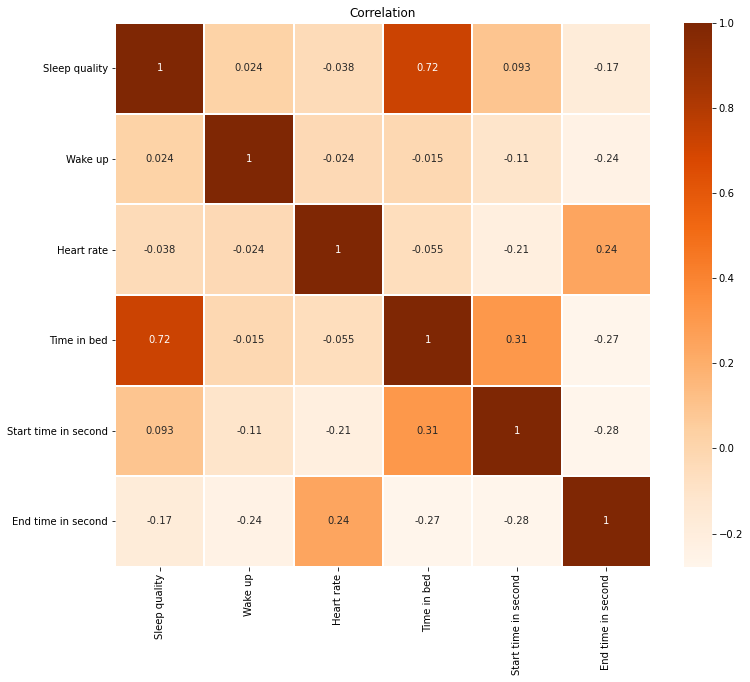

In [81]:
# visualisation of this correlation
fig = plt.figure(figsize = (12,10))
r = sns.heatmap(df3.corr(),cmap='Oranges',annot=True,linewidth=1)
# set title
r.set_title('Correlation')

In [ ]:
#explore data

/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributi

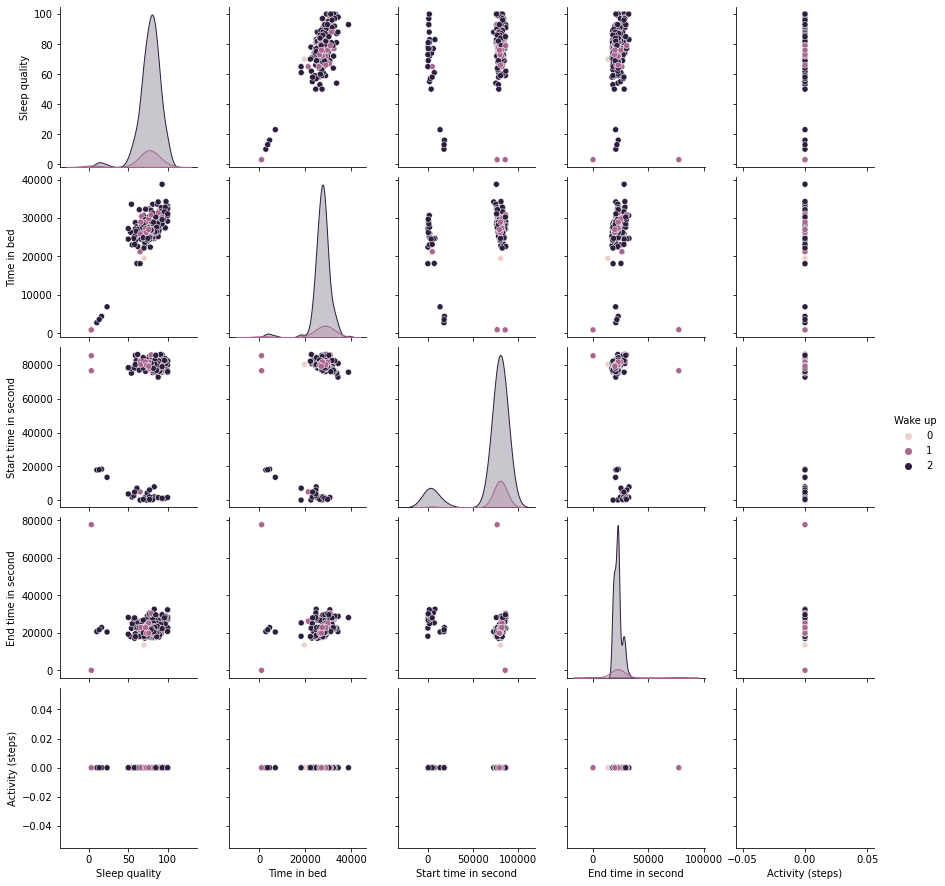

In [61]:
# Pairplot
sns.pairplot(df2, hue='Wake up')

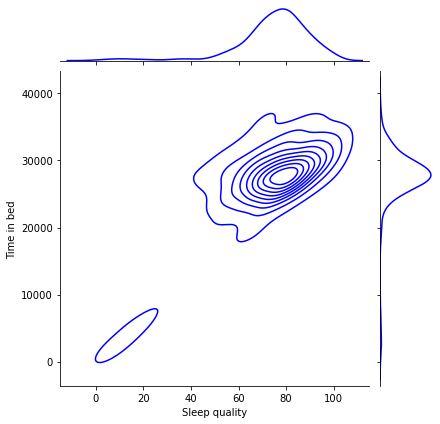

In [62]:
# Joint plot of features "Sleep quality" and "Time in bed" with unit second.
sns.jointplot(x='Sleep quality',y='Time in bed',data=df,color='blue',kind = 'kde')

In [63]:
# The average of "Time in bed"

print ('The average time in bed of these users is :', df['Time in bed'].mean(), 'second')
print ('The average time in bed of these users is :', df['Time in bed'].mean()/3600, 'hour')


The average time in bed of these users is : 27545.25479143179 second
The average time in bed of these users is : 7.651459664286609 hour


Text(0, 0.5, 'Count')

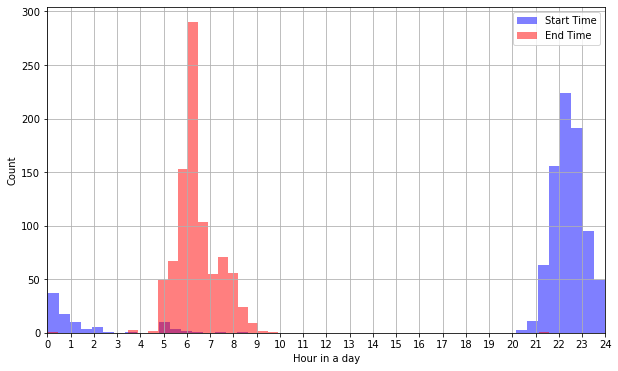

In [64]:
# The Histogram of Start time and End time
plt.figure(figsize=(10,6))
df['Start in hour'] = df['Start time in second'].apply(lambda x: x/3600)
df['End in hour'] = df['End time in second'].apply(lambda x: x/3600)
df['Start in hour'].hist(alpha=0.5,color='blue',label='Start Time',bins=50)
df['End in hour'].hist(alpha=0.5,color='red',label='End Time',bins=50)
plt.legend()
plt.xlim((0, 24)) 
plt.xticks(np.arange(0, 25, 1))
plt.xlabel('Hour in a day')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

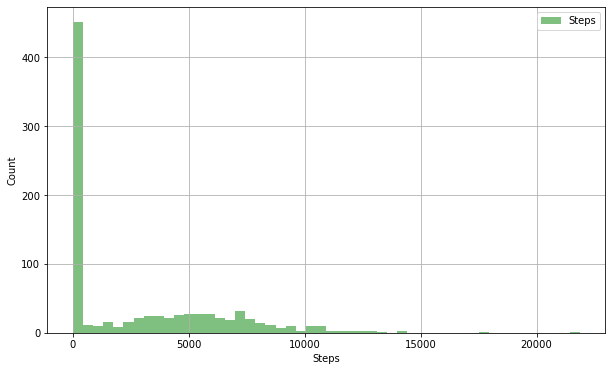

In [65]:
# The Histogram of Steps
plt.figure(figsize=(10,6))
df['Activity (steps)'].hist(alpha=0.5,color='green',label='Steps',bins=50)
plt.legend()

plt.xlabel('Steps')
plt.ylabel('Count')

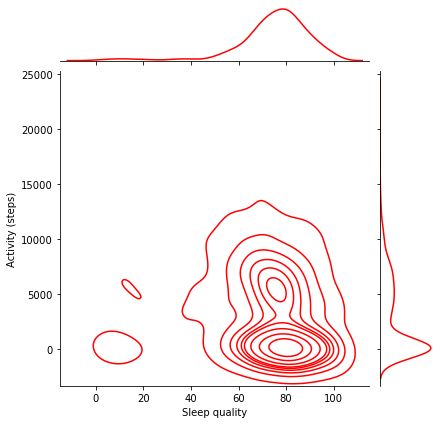

In [66]:
# Joint plot of features "Sleep quality" and "Activity" with unit second.
sns.jointplot(x='Sleep quality',y='Activity (steps)',data=df,color='red',kind = 'kde')


In [67]:
# Drop the non-meaning value of steps (0)

df_new = df[df['Activity (steps)'] != 0]
df_new

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Start time,End time,Start time in second,End time in second,Start in hour,End in hour
411,2016-08-17 22:42:29,2016-08-18 06:15:46,78,27197.0,NaN,Ate late:Drank coffee:Worked out,NaN,7200,22:42:29,06:15:46,81749,22546,22.708056,6.262778
412,2016-08-18 21:58:44,2016-08-19 06:23:31,36,30287.0,NaN,Drank coffee:Worked out,NaN,3444,21:58:44,06:23:31,79124,23011,21.978889,6.391944
413,2016-08-20 22:04:29,2016-08-21 08:33:27,56,37738.0,NaN,Drank coffee,NaN,7901,22:04:29,08:33:27,79469,30807,22.074722,8.557500
414,2016-08-21 22:08:40,2016-08-22 06:20:25,52,29505.0,NaN,Drank coffee:Drank tea,NaN,3786,22:08:40,06:20:25,79720,22825,22.144444,6.340278
415,2016-08-22 22:13:35,2016-08-23 06:22:47,35,29352.0,NaN,Drank coffee:Worked out,NaN,2668,22:13:35,06:22:47,80015,22967,22.226389,6.379722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91,32881.0,NaN,NaN,NaN,56,21:54:14,07:02:15,78854,25335,21.903889,7.037500
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81,25894.0,NaN,NaN,NaN,64,23:49:19,07:00:53,85759,25253,23.821944,7.014722
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71,32207.0,NaN,NaN,NaN,3316,21:24:05,06:20:52,77045,22852,21.401389,6.347778
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80,33239.0,NaN,NaN,NaN,6555,21:36:32,06:50:31,77792,24631,21.608889,6.841944


In [68]:
# Let's check the correlations of features to the "sleep quality"
df_new.corr()['Sleep quality'].sort_values(ascending = False)

Sleep quality           1.000000
Time in bed             0.647258
Start time in second    0.192031
Start in hour           0.192031
End in hour             0.163342
End time in second      0.163342
Activity (steps)       -0.136605
Heart rate                   NaN
Name: Sleep quality, dtype: float64

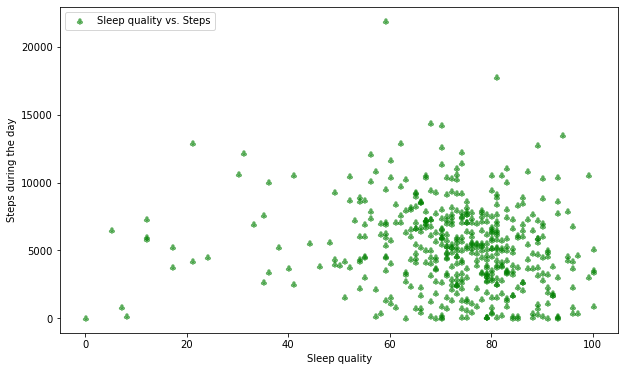

In [69]:
# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_new['Sleep quality'],df_new['Activity (steps)'], c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Sleep quality vs. Steps")
plt.xlabel("Sleep quality")
plt.ylabel("Steps during the day")
plt.legend(loc='upper left')
plt.show()

In [ ]:
#machine learning 

In [70]:
# We use features of "Time in bed","Start time in second", "End time in second" and "Activity (steps)" to predict the feature "Sleep quality"
# We choose to use df
X = df[['Time in bed', 'Start time in second','End time in second','Activity (steps)']].values
y = df['Sleep quality'].values


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [72]:
# In order to normalize the features, it is better to use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#LinearRegression Model

In [73]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

print('test accuracy:', lm.score(X_test,y_test))

test accuracy: 0.41236039548039705


In [ ]:
#KNN (K nearest neighbors) model

Text(0, 0.5, 'Error Rate')

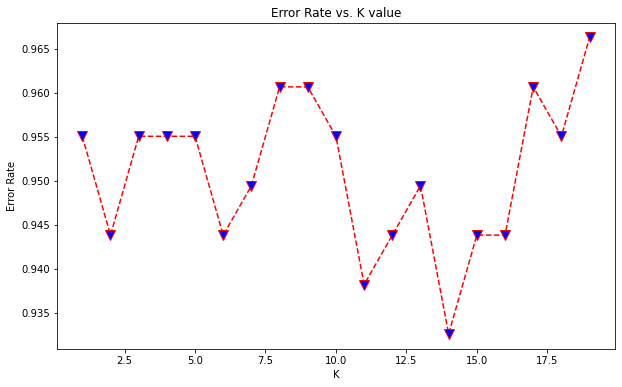

In [74]:
from sklearn.neighbors import KNeighborsClassifier

error_rate =[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate, color ='red',linestyle='dashed',marker='v',
        markerfacecolor = 'blue', markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [75]:
knn = KNeighborsClassifier(n_neighbors=14) # why 5 is because of Elbow method
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [76]:
print('test accuracy:', knn.score(X_test,y_test))

test accuracy: 0.06741573033707865


In [ ]:
#logistic regression

In [77]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
print('test accuracy:', logmodel.score(X_test,y_test))

test accuracy: 0.03932584269662921


In [ ]:
#decision tree model

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print('test accuracy:', dtree.score(X_test,y_test))

test accuracy: 0.028089887640449437


In [ ]:
#random tree model

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)
print('test accuracy:', rfc.score(X_test,y_test))

test accuracy: 0.0449438202247191


In [ ]:
#Support Machine Vector (SVM) Algorithm
#Support vector machines (SVMs) are a set of supervised machine learning methods used for classification, regression and outlier detection.

#The advantages of support vector machines are :

#• Effective in high dimentional spaces. • Still effective in cases where number of dimensions is greater than the number of samples. • Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient. • Versatile: different kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

#The disadvantages of support vector machines are :

#• If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial. • SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross validation.

In [80]:
# First SVM model
from sklearn.svm import SVC
svm=SVC(random_state=101)
svm.fit(X_train, y_train)
print('train accuracy:', svm.score(X_train,y_train))
print('test accuracy:', svm.score(X_test,y_test))

train accuracy: 0.06770098730606489
test accuracy: 0.033707865168539325


use out of bag bootstrapping for more accurate result 

In [92]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)
# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
                       n_estimators=50,
                       oob_score=True,
                       random_state=1)


In [93]:
# Fit bc to the training set 
bc.fit(X_train, y_train)
# Predict test set labels
y_pred = bc.predict(X_test)
# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)
# Evaluate OOB accuracy
acc_oob = bc.oob_score_
# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))


Test set accuracy: 0.051, OOB accuracy: 0.055


In [96]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [97]:
coef=lm.coef_
print(coef)

[ 87.79861781  -2.06712263  -2.25733779 -19.38151733]


logistic regression

In [106]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [107]:
coefs=clf.coef_
print(coefs)

[[-1.36088590e+00  2.24001369e-01  4.00693173e-01 -2.48920753e-01]
 [-6.72032369e-01 -5.41548469e-01 -2.72045744e-02  1.61036068e-01]
 [-6.62684753e-01 -5.23558145e-01  4.79388244e-04 -1.28029736e-01]
 [-6.50796716e-01 -4.30105612e-01  1.22659495e-01 -1.20603895e-01]
 [-6.38457615e-01 -5.40421824e-01 -7.93273633e-03 -1.28047188e-01]
 [-1.19778608e+00 -9.44109229e-01 -1.64375142e-02 -2.50627854e-01]
 [-1.59547399e+00 -1.24494137e+00 -6.56742171e-03  4.44508603e-01]
 [-6.10198476e-01 -5.64487318e-01 -2.32460565e-02 -1.28069106e-01]
 [-5.88854431e-01 -5.61082681e-01 -7.92554851e-03 -1.28078139e-01]
 [-5.72432657e-01 -5.56379690e-01  6.20632128e-03  3.97008583e-02]
 [-5.47626662e-01 -5.25312617e-01  5.79600842e-02 -1.28085393e-01]
 [-1.03926175e+00 -9.91793901e-01  4.53859051e-03  4.90157911e-01]
 [-5.22760463e-01 -6.13243417e-01 -3.87192733e-02 -1.28128061e-01]
 [-5.03066453e-01 -5.59326716e-01  3.83991975e-02  7.42981478e-02]
 [-5.69295374e-02  1.36611960e-01  8.50261649e-03  3.44937093e

In [108]:
accuracy=clf.score(X_test,y_test)
print(accuracy)

0.03932584269662921


In [109]:
#mean squared error
from sklearn.metrics import mean_squared_error
preds=lm.predict(X)
mse=mean_squared_error(y,preds)
print(mse)

4829873580311.667


In [111]:
#mean absolute error
from sklearn.metrics import confusion_matrix
preds=clf.predict(X_test)
matrix=confusion_matrix(y_test,preds)
print(matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [113]:
#compute and print the recall
#from sklearn.metrics import recall_score
#preds=clf.predict(X_test)
#recall=recall_score(y_test,preds)
#print(recall)

In [116]:
#compute and print the precision
#from sklearn.metrics import precision_score
#preds=clf.predict(X_test)
#precision=precision_score(y_test,preds)
#print(precision)